### Bike data

In [78]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df1 = pd.read_csv('Bike-Sharing-Dataset/day.csv')
df2 = pd.read_csv('Bike-Sharing-Dataset/hour.csv')
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [80]:
## Mapping numbers to days, months and seasons

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
mmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
smap = {1:'spring',2:'summer',3:'fall',4:'winter'}
df1['weekday'] = df1['weekday'].map(dmap)
df1['mnth'] = df1['mnth'].map(mmap)
df1['season'] = df1['season'].map(smap)

df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,Jan,0,Sun,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Mon,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Tue,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Wed,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Thu,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
df1.describe()

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Highest number of bikes used in a single day

In [82]:
df1['cnt'].max()

8714

##### Average(mean) casual bike usuage per day in the spring season. The data is from city of Porto, maybe it's too rainy in spring there? :)

In [83]:
df1[df1['season'] == 'spring']['casual'].mean()

334.9281767955801

##### Total number of riders on the coldest day

In [84]:
df1[df1['temp'] == df1['temp'].min()]['cnt']

21    981
Name: cnt, dtype: int64

##### Total number of riders on the day with highest windspeed

In [85]:
df1[df1['windspeed'] == df1['windspeed'].max()]['cnt']

49    1635
Name: cnt, dtype: int64

##### Total number casual riders vs feels like temperature

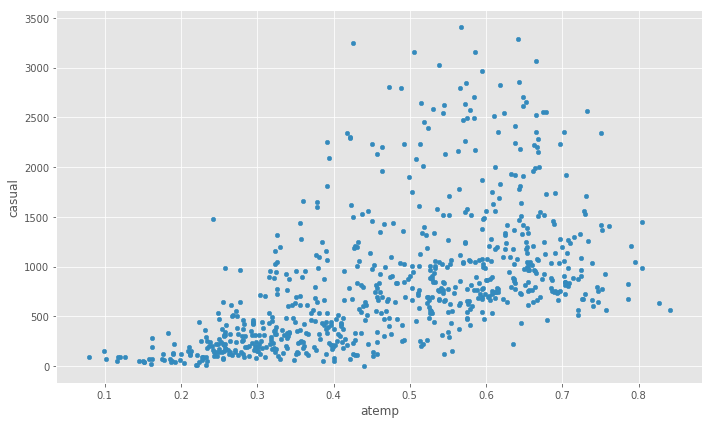

In [86]:
df1.plot.scatter(x='atemp',y='casual', figsize=(10,6))

In [87]:
seasons = df1.groupby('season')
seasons['casual'].mean()

season
fall      1202.611702
spring     334.928177
summer    1106.097826
winter     729.112360
Name: casual, dtype: float64

In [88]:
seasons = df1.groupby('weekday')
seasons['registered'].mean()

weekday
Fri    4076.298077
Mon    2890.533333
Sat    3938.000000
Sun    3085.285714
Thu    3997.394231
Tue    3663.990476
Wed    3954.480769
Name: registered, dtype: float64

In [90]:
seasons = df1.groupby('holiday')
seasons['registered'].mean()

holiday
0    3685.332394
1    2670.285714
Name: registered, dtype: float64

##### Casual vs Registered vs Temp

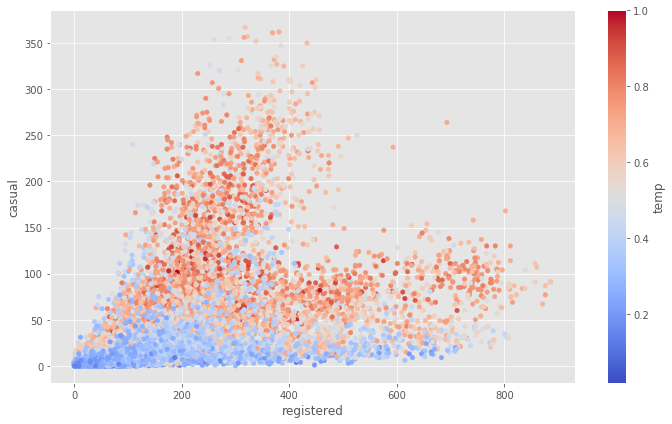

In [91]:
fig, ax = plt.subplots()
df2.plot.scatter(x='registered',y='casual',c='temp',cmap='coolwarm', figsize= (10,6), ax=ax)

##### Pie chart of Casual riders in a season

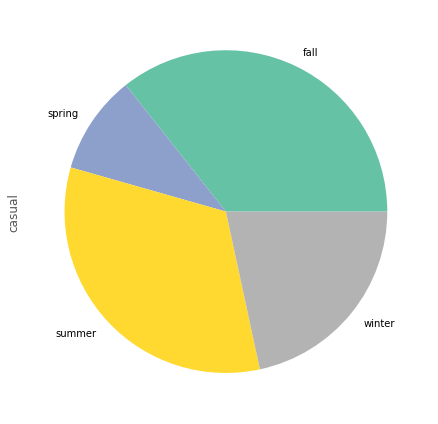

In [92]:
seasons = df1.groupby('season')
seasons['casual'].mean().plot(kind='pie',cmap="Set2", figsize=(10,6))

##### Pie chart of registered riders by month

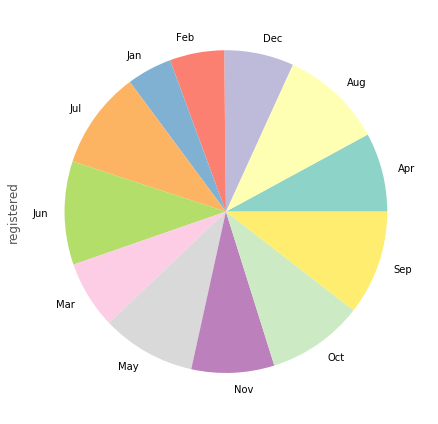

In [93]:
months = df1.groupby('mnth')
months['registered'].mean().plot(kind='pie',cmap="Set3", figsize=(10,6))